<a href="https://colab.research.google.com/github/Sirangua/Analisis_audio_detectar_emociones/blob/master/Power_Consuption_IoTDevices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import matplotlib.pyplot as plt

LoRa

In [66]:
def lora (Tnotif):
  # DR = 0, Tw2w = 100
  TI = 0
  #Tnotif = 60000 #60s
  Tact = 4877.94
  Tsleep = (Tnotif-Tact)
  ti = np.array ([168.2,83.8,2793.5,983.3,262.14,100,33,147.4,268,38.6, Tsleep])
  ii = np.array ([22.1,13.3,83,27,38.1,27.1,35,13.2,21,13.3,0.045])
  for i in range (11):
    TI += ti[i] *ii [i]
  I_lora = ((1/Tnotif)*(TI))
  return I_lora

Bluetooth

In [67]:
def bluetooth (PollTimeOut):
  # Tdata = 1000 ms, Recieve window = 255 ms
  TI = 0
  TI2 = 0
  Tdata = 1000
  #PollTimeOut = 60000
  Tact = 146.82 + (14.63*(PollTimeOut /Tdata ))
  Tsleep = PollTimeOut-Tact
  ti = np.array ([Tsleep, 1.51, 0.52, 1.53, 0.53, 0.3, 0.33, 0.29, 0.62, 14, 1.57, 255, 0.32, 26.3])
  ii = np.array ([0.015, 0.38, 8.45, 8.85, 8.87, 3.66, 3.91, 5.84, 1.2, 0.074, 0.34, 13.9, 6.44, 0.07])
  for i in range (13):
    TI += ti[i] *ii [i]
  for i in range (9):
    TI2 += ti[i] *ii [i]
  I_bluetooth = (1/PollTimeOut)*(TI+((PollTimeOut/Tdata)*TI2))
  return I_bluetooth

SigFox

In [68]:
def sigfox (Tperiod):
  # 12-byte payload, unidireccional
  TI = 0
  #Tperiod = 60000
  Tsleep = Tperiod - 8009
  ti = np.array ([287, 2080, 486, 510, Tperiod])
  ii = np.array ([10.4, 27.2, 1.2, 1.2, 0.016])
  for i in range (5):
    if i == 1:
      TI += ti[i] *ii [i] * 3
    elif i == 2:
      TI += ti[i] *ii [i] * 2
    else:
      TI += ti[i] *ii [i]

  I_sigfox = (1/Tperiod)*TI
  return I_sigfox

NB_IoT

In [69]:
def nb_iot (deepsleep):
  TI = 0
  #deepsleep = 60000 #60s
  Tact = 54723
  Tsleep = (deepsleep-Tact)
  ti = np.array ([5390, 11030, 6930, 31000, 373, Tsleep])
  ii = np.array ([8.46, 57.63, 28.07, 9.58, 46.12, 0.1])
  for i in range (6):
    TI += ti[i] *ii [i]
  I_nbiot = ((1/deepsleep)*(TI))
  return I_nbiot

Zigbee

In [70]:
def zigbee (Tzigbee):
  # 12 byte, 255 ms scanning channel
  TI = 0
  #Tzigbee = 60000 #60s
  Tact = 4853.254
  Tsleep = (Tzigbee-Tact)
  ti = np.array ([Tsleep, 2.85, 1.374, 0.68, 1.2, 255])
  ii = np.array ([0.0003, 15.56, 32, 25.5, 10, 21.8])
  for i in range (6):
    TI += ti[i] *ii [i]
  I_zigbee = ((1/Tzigbee)*(TI))
  return I_zigbee

In [77]:
print (power_zigbee)

[0.         0.34159188 0.17133594 0.11458396 0.08620797 0.06918238
 0.05783198 0.04972455 0.04364399 0.03891465 0.03513119 0.03203563
 0.02945599 0.02727322 0.02540228 0.02378079 0.02236199 0.02111011
 0.01999733 0.01900168 0.01810559 0.01729485 0.01655781 0.01588486
 0.015268   0.01470048 0.01417661 0.01369155 0.01324114 0.01282179
 0.0124304  0.01206425 0.011721   0.01139854 0.01109506 0.01080891
 0.01053866 0.01028302 0.01004084 0.00981107 0.0095928  0.00938517
 0.00918743 0.00899888 0.00881891 0.00864693 0.00848243 0.00832493
 0.008174   0.00802922 0.00789024 0.0077567  0.00762831 0.00750475
 0.00738578 0.00727113 0.00716057 0.00705389 0.00695089 0.00685139
 0.0067552  0.00666216 0.00657213 0.00648495 0.0064005  0.00631864
 0.00623927 0.00616227 0.00608753 0.00601495 0.00594446 0.00587594
 0.00580933 0.00574455 0.00568151 0.00562016 0.00556042 0.00550223
 0.00544554 0.00539028 0.0053364  0.00528385 0.00523258 0.00518255
 0.00513371 0.00508602 0.00503944 0.00499393 0.00494945 0.0049

In [72]:
t = 100
time_array = np.array (range(t))
power_bluetooth = np.zeros(t)
power_sigfox = np.zeros(t)
power_lora = np.zeros(t)
power_zigbee = np.zeros(t)
power_nb_iot = np.zeros(t)

for i in range(1,t):
  time = i*60000
  power_bluetooth [i] = bluetooth(time)*3.6
  power_sigfox [i] = sigfox (time)*3.6
  power_lora [i] = lora (time)*3.6
  power_zigbee [i] = zigbee (time)*3.6
  power_nb_iot [i] = nb_iot (time)*3.6

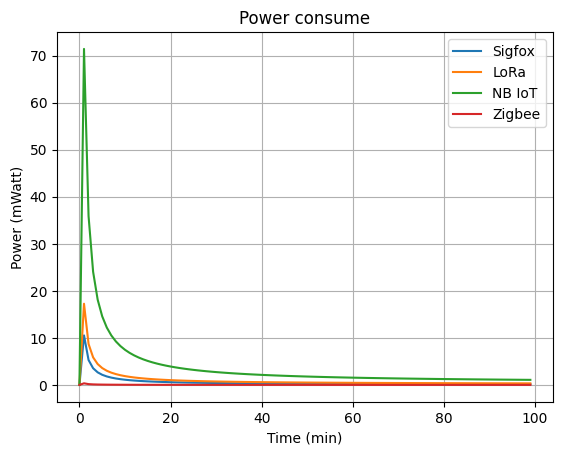

In [79]:
fig, ax = plt.subplots()
#ax.plot(time_array, power_bluetooth, label='Bluetooth')
ax.plot(time_array, power_sigfox, label='Sigfox')
ax.plot(time_array, power_lora, label='LoRa')
ax.plot(time_array, power_nb_iot, label='NB IoT')
ax.plot(time_array, power_zigbee, label='Zigbee')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Power (mWatt)')
ax.set_title('Power consumption')
ax.grid('on')
ax.legend()
plt.show()